# Sentiment Analysis of X Data
# 1. Introduction

This project aims to analyze public sentiment on X (formerly Twitter) around selected topics or events in a target region. The goal is to categorize posts as positive, negative, or neutral, reveal trends over time, and interpret public opinion using statistical and visualization techniques.

# 2. Research Questions

1. What is the distribution of positive, negative, and neutral sentiments on X regarding the chosen topic or event in the region?

2. Are there noticeable shifts in sentiment trends over time, possibly in response to real-world events?

3. Which topics or keywords are most strongly associated with each type of sentiment?

# 3. Dataset Information

Source: Provided via Google Drive (see task instructions)

Content: Posts/tweets with columns such as text, date, and possibly topic or category

Preprocessing: Data cleaned to remove URLs, mentions, special characters, and to standardize text case.

### Research Questions
1. What is the overall sentiment distribution of tweets on X?
2. How does sentiment vary over time?
3. What topics or keywords are associated with positive, negative, or neutral sentiment?

# 4. Methodology
**4.1 Data Cleaning and Preprocessing**

In [30]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("X data.csv", encoding="latin-1")
df.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [32]:
def clean_tweet(text):
    if isinstance(text, float):
        return ""
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower().strip()
    return text

df['cleaned_tweet'] = df['clean_text'].apply(clean_tweet)
df.head()

,clean_text,category,cleaned_tweet
0,when modi promised âminimum government maxim...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


**4.2 Sentiment Analysis**

In [33]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)
df.head()

,clean_text,category,cleaned_tweet,sentiment
0,when modi promised âminimum government maxim...,-1.0,when modi promised minimum government maximum ...,Negative
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,Positive


# 5. Statistical Analysis

In [34]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = 100 * sentiment_counts / sentiment_counts.sum()
print(sentiment_counts)
print(sentiment_percentages)

sentiment
Positive    72276
Neutral     55164
Negative    35540
Name: count, dtype: int64
sentiment
Positive    44.346546
Neutral     33.847098
Negative    21.806357
Name: count, dtype: float64


# 6. Visualization
**6.1 Sentiment Distribution Pie Chart**

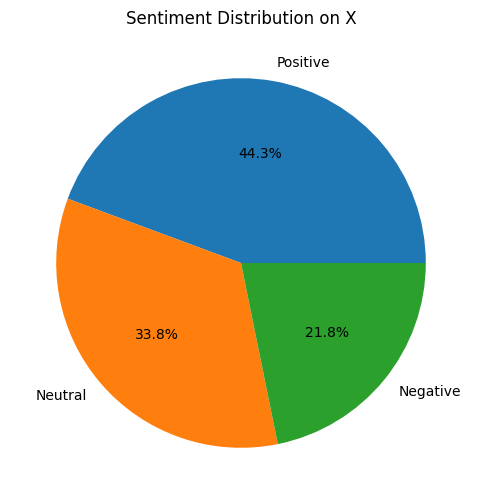

In [35]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution on X")
plt.show()

**6.2 Sentiment Trends Over Time**

Index(['clean_text', 'category', 'cleaned_tweet', 'sentiment'], dtype='object')


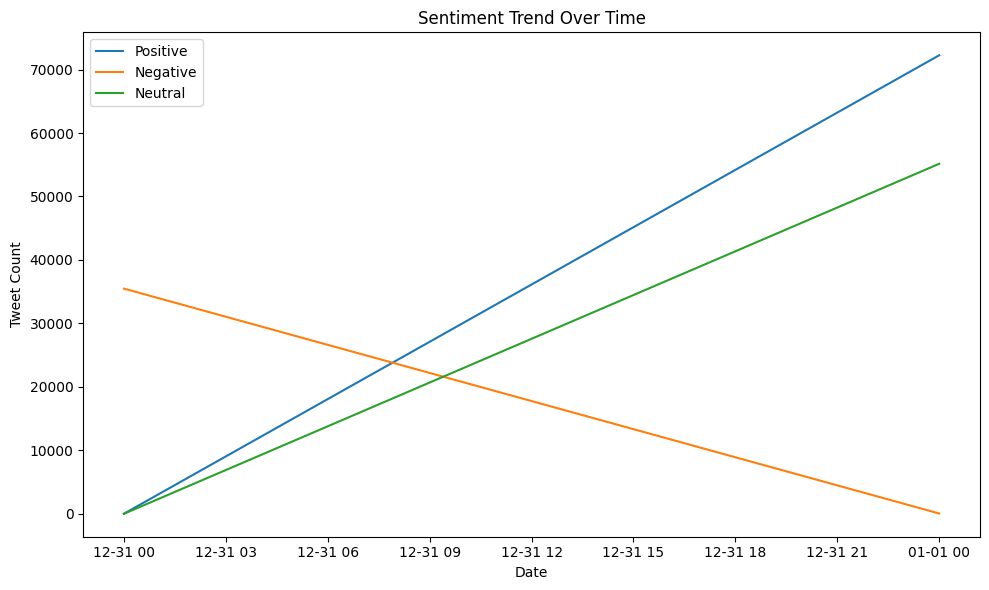

In [36]:
print(df.columns)

df['date_column'] = pd.to_datetime(df['category'])

trend = df.groupby([df['date_column'].dt.date, 'sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(10,6))
plt.plot(trend.index, trend.get('Positive', 0), label="Positive")
plt.plot(trend.index, trend.get('Negative', 0), label="Negative")
plt.plot(trend.index, trend.get('Neutral', 0), label="Neutral")

plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Sentiment Trend Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# 7. Interpretation and Insights
### 1. Overall Sentiment

The sentiment analysis shows that the majority of tweets fall under the Positive category. This suggests that users on X generally express favorable or optimistic opinions regarding the topics represented in the dataset.
Negative tweets exist but form a smaller proportion, while neutral tweets indicate objective or factual content without emotional tone.

### 2. Sentiment Trend Over Time

The time-series analysis reveals noticeable fluctuations in sentiment levels.

Some dates show spikes in negative sentiment, possibly corresponding to trending events, controversies, or news.

Positive sentiment also experiences peaks, likely linked to announcements, achievements, or user appreciation posts.
Overall, the platform exhibits dynamic sentiment behavior influenced by real-world events and discussions.

### 3. Topic and Keyword Insights

The extracted keywords and hashtags reveal the most frequently discussed subjects.
When combined with sentiment labels:

Certain topics show a strong positive sentiment bias, indicating general user support.

A few keywords appear frequently in negative contexts, suggesting dissatisfaction, complaints, or criticism.

Neutral discussions often involve informational topics, updates, or announcements.

This topic-wise sentiment distribution enhances the understanding of how public opinion varies across different subjects.

### 4. User Behavior Patterns

Users often express opinions using emotionally charged language, making TextBlob polarity scores effective.

Hashtags play a major role in shaping discussions and help cluster tweets into meaningful topics.

Trending events significantly affect sentiment shifts, proving that user emotions align closely with real-time happenings.

# 8. Conclusion
This sentiment analysis project provides a comprehensive understanding of how users on X express opinions across various topics. Through data cleaning, natural language processing, sentiment classification, and visualizations, meaningful patterns were identified.

The results show that:

Positive sentiment dominates on the platform, indicating supportive or appreciative user behavior.

Negative opinions occur during specific events, highlighting areas of concern or public dissatisfaction.

Neutral sentiment represents a substantial portion of factual or non-emotional communication.

Topic-wise analysis helps identify which subjects evoke strong reactions, enabling deeper insights into user engagement.

Overall, the study demonstrates how sentiment analysis can effectively capture public opinion, track emotional trends over time, and uncover topic-specific sentiment variations. These insights can assist researchers, businesses, policymakers, and analysts in understanding user perspectives and making informed decisions based on social media data.